In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện để xử lý các text entry
import fuzzywuzzy
from fuzzywuzzy import process

from pandas.api.types import CategoricalDtype

# Thư viện dùng để ẩn các warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = 'VN_housing_dataset.csv'

In [3]:
# Load dữ liệu và xem vài dòng đầu tiên của data.

df = pd.read_csv(DATA_PATH)
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


In [4]:
# Xem thông tin của data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB


# Data Cleaning

In [5]:
# Drop các dòng bị trùng

df.drop_duplicates(inplace=True)

In [6]:
# Số lượng các giá trị bị thiếu trong mỗi cột

df.isna().sum()

Unnamed: 0             1
Ngày                   1
Địa chỉ               48
Quận                   2
Huyện                 48
Loại hình nhà ở       32
Giấy tờ pháp lý    28887
Số tầng            46098
Số phòng ngủ          39
Diện tích              2
Dài                62670
Rộng               47052
Giá/m2                13
dtype: int64

In [7]:
# Tỉ lệ giá trị NaN trong mỗi cột

ratio_nan_per_col = df.isna().sum() / len(df) * 100
ratio_nan_per_col

Unnamed: 0          0.001212
Ngày                0.001212
Địa chỉ             0.058184
Quận                0.002424
Huyện               0.058184
Loại hình nhà ở     0.038789
Giấy tờ pháp lý    35.015819
Số tầng            55.878396
Số phòng ngủ        0.047274
Diện tích           0.002424
Dài                75.966399
Rộng               57.034801
Giá/m2              0.015758
dtype: float64

Có thể thấy các cột 'Unnamed: 0', 'Ngày', 'Địa chỉ', 'Quận (Huyện, Thị xã)', 'Huyện', 'Loại hình nhà ở', 'Giấy tờ pháp lý', 'Số phòng ngủ', 'Diện tích' và 'Giá/m2' có số lượng giá trị NaN > 0.1%, nên thay vì xử lý, ta sẽ drop nó luôn

In [8]:
print('Số lượng các dòng trước khi drop NaN:', len(df), 'dòng')

Số lượng các dòng trước khi drop NaN: 82497 dòng


In [9]:
for col, ratio in zip(ratio_nan_per_col.index, ratio_nan_per_col.values):
    if ratio < 1:
        df.dropna(subset=col, inplace=True)

In [10]:
print('Số lượng các dòng sau khi drop NaN:', len(df), 'dòng')

Số lượng các dòng sau khi drop NaN: 82360 dòng


## Convert cột "Ngày" sang datetime

In [11]:
df['Ngày'] = pd.to_datetime(df['Ngày'])

## Drop cột Unnamed: 0

In [12]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


## Kiểm tra cột "Quận"

In [13]:
df['Quận'].unique()

array(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
       'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
       'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
       'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
       'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
       'Huyện Đông Anh', 'Huyện Thường Tín', 'Thị xã Sơn Tây',
       'Huyện Mê Linh', 'Huyện Thạch Thất', 'Huyện Quốc Oai',
       'Huyện Phúc Thọ', 'Huyện Phú Xuyên', 'Huyện Ba Vì', 'Huyện Mỹ Đức'],
      dtype=object)

***Normial category***

Chuyển data-type của 'Quận (Huyện, Thị xã)' sang 'category'.

Nếu các giá trị của 1 cột là hữu hạn, ta nên đưa nó về category, nó sẽ giúp tiết kiệm bộ nhớ, cũng như có thể sử dụng các phương thức khác, mà kiểu object không thể, mặc dù cả hai đều chứa string.<br>
Trong trường hợp, cột đó chứa feedback, hoặc description của sản phẩm, thì ta sẽ để nó ở kiểu object.

In [14]:
before = df['Quận'].memory_usage()  # memory usage of column in bytes
print(f'Trước khi chuyển sang categoy: {before * 1e-3} kb')

Trước khi chuyển sang categoy: 1317.76 kb


In [15]:
df['Quận'] = df['Quận'].astype('category')

after = df['Quận'].memory_usage()
print(f'Sau khi chuyển sang category: {after * 1e-3} kb')

result = (before - after) / before
print(f'Giảm tới: {round(result * 100, 2)}%')

Sau khi chuyển sang category: 742.544 kb
Giảm tới: 43.65%


Sau khi chuyển kiểu dữ liệu sang category, ta có thể encode, sắp xếp hoặc so sánh (nếu như đó là ordinal category).

In [16]:
df['Quận'].cat.categories

Index(['Huyện Ba Vì', 'Huyện Chương Mỹ', 'Huyện Gia Lâm', 'Huyện Hoài Đức',
       'Huyện Mê Linh', 'Huyện Mỹ Đức', 'Huyện Phú Xuyên', 'Huyện Phúc Thọ',
       'Huyện Quốc Oai', 'Huyện Sóc Sơn', 'Huyện Thanh Oai', 'Huyện Thanh Trì',
       'Huyện Thường Tín', 'Huyện Thạch Thất', 'Huyện Đan Phượng',
       'Huyện Đông Anh', 'Quận Ba Đình', 'Quận Bắc Từ Liêm', 'Quận Cầu Giấy',
       'Quận Hai Bà Trưng', 'Quận Hoàn Kiếm', 'Quận Hoàng Mai', 'Quận Hà Đông',
       'Quận Long Biên', 'Quận Nam Từ Liêm', 'Quận Thanh Xuân', 'Quận Tây Hồ',
       'Quận Đống Đa', 'Thị xã Sơn Tây'],
      dtype='object')

In [17]:
df['Quận'].head()

0        Quận Cầu Giấy
1      Quận Thanh Xuân
2    Quận Hai Bà Trưng
3          Quận Tây Hồ
4      Quận Thanh Xuân
Name: Quận, dtype: category
Categories (29, object): ['Huyện Ba Vì', 'Huyện Chương Mỹ', 'Huyện Gia Lâm', 'Huyện Hoài Đức', ..., 'Quận Thanh Xuân', 'Quận Tây Hồ', 'Quận Đống Đa', 'Thị xã Sơn Tây']

In [18]:
df['Quận'].cat.codes[:5]

0    18
1    25
2    19
3    26
4    25
dtype: int8

## Kiểm tra cột "Giấy tờ pháp lý"

***Ordinal Category***

Việc chuyển sang Ordinal Category cũng giống như Norminal Category, nhưng ta sẽ thêm vào đó order của các giá trị.<br>
Ví dụ, 'thấp' < 'trung bình' < 'cao'

In [19]:
df['Giấy tờ pháp lý'].fillna('Unknown', inplace=True)

In [20]:
df['Giấy tờ pháp lý'].unique()

array(['Đã có sổ', 'Unknown', 'Đang chờ sổ', 'Giấy tờ khác'], dtype=object)

Ở đây ta có 'Đã có sổ', nan, 'Đang chờ sổ', 'Giấy tờ khác', vậy ta có thể tưởng tượng trong đầu ra thứ tự của nó.<br>

'Unknown < 'Giấy tờ khác' < 'Đang chờ sổ' < 'Đã có sổ'

#### Trước khi chuyển sang ordinal category

In [21]:
df[df['Giấy tờ pháp lý'] > 'Giấy tờ khác']['Giấy tờ pháp lý'].unique()

array(['Đã có sổ', 'Unknown', 'Đang chờ sổ'], dtype=object)

#### Sau khi chuyển sang ordinal category

In [22]:
giay_to_phap_ly = ['Unknown', 'Giấy tờ khác', 'Đang chờ sổ', 'Đã có sổ']
df['Giấy tờ pháp lý'] = df['Giấy tờ pháp lý'].astype(CategoricalDtype(categories=giay_to_phap_ly, ordered=True))

In [23]:
df[df['Giấy tờ pháp lý'] > 'Giấy tờ khác']['Giấy tờ pháp lý'].unique()

['Đã có sổ', 'Đang chờ sổ']
Categories (4, object): ['Unknown' < 'Giấy tờ khác' < 'Đang chờ sổ' < 'Đã có sổ']

*Note*: Có thể thấy, khi lọc các entries ở cột "Giấy tờ pháp lý" có giá trị cao hơn "Giấy tờ khác", sẽ trả về các entries có giá trị là "Đã có sổ" và "Đang chờ sổ" đúng như order ta mong muốn.

In [24]:
df['Giấy tờ pháp lý'].head()

0    Đã có sổ
1     Unknown
2    Đã có sổ
3    Đã có sổ
4     Unknown
Name: Giấy tờ pháp lý, dtype: category
Categories (4, object): ['Unknown' < 'Giấy tờ khác' < 'Đang chờ sổ' < 'Đã có sổ']

## Kiểm tra cột "Loại hình nhà ở"

In [25]:
df['Loại hình nhà ở'].unique()

array(['Nhà ngõ, hẻm', 'Nhà mặt phố, mặt tiền', 'Nhà biệt thự',
       'Nhà phố liền kề'], dtype=object)

In [26]:
loai_hinh_nha_o = ['Nhà ngõ, hẻm', 'Nhà mặt phố, mặt tiền', 'Nhà phố liền kề', 'Nhà biệt thự']
df['Loại hình nhà ở'] = df['Loại hình nhà ở'].astype(CategoricalDtype(categories=loai_hinh_nha_o, ordered=True))

In [27]:
df['Loại hình nhà ở'].head()

0             Nhà ngõ, hẻm
1    Nhà mặt phố, mặt tiền
2             Nhà ngõ, hẻm
3             Nhà ngõ, hẻm
4             Nhà ngõ, hẻm
Name: Loại hình nhà ở, dtype: category
Categories (4, object): ['Nhà ngõ, hẻm' < 'Nhà mặt phố, mặt tiền' < 'Nhà phố liền kề' < 'Nhà biệt thự']

## Kiểm tra cột "Huyện"

Đổi tên 'Huyện' sang 'Phường'

In [28]:
df.rename(columns={'Huyện': 'Phường'}, inplace=True)

In [29]:
df['Phường'].unique()

array(['Phường Nghĩa Đô', 'Phường Kim Giang', 'Phường Minh Khai',
       'Phường Thụy Khuê', 'Phường Yên Hoà', 'Phường Trung Liệt',
       'Phường Đống Mác', 'Phường Xuân La', 'Phường Văn Quán',
       'Thị trấn Văn Điển', 'Phường Định Công', 'Phường Bồ Đề',
       'Phường Quang Trung', 'Phường Thanh Lương', 'Phường Khương Trung',
       'Phường Phúc Tân', 'Phường Gia Thụy', 'Phường Khương Đình',
       'Phường Phương Canh', 'Phường Tương Mai', 'Phường La Khê',
       'Phường Mễ Trì', 'Phường Khương Mai', 'Phường Láng Hạ',
       'Phường Quan Hoa', 'Phường Tây Mỗ', 'Phường Ngọc Khánh',
       'Phường Đại Mỗ', 'Xã Tả Thanh Oai', 'Phường Mỹ Đình 1',
       'Xã Tam Hiệp', 'Phường Cống Vị', 'Phường Bách Khoa',
       'Phường Vĩnh Phúc', 'Xã Kim Chung', 'Phường Đại Kim',
       'Phường Mai Động', 'Phường Trung Tự', 'Phường Kiến Hưng',
       'Phường Trúc Bạch', 'Phường Cổ Nhuế 1', 'Phường Đức Giang',
       'Phường Mỹ Đình 2', 'Phường Bưởi', 'Phường Ô Chợ Dừa',
       'Phường Long Biên', 'P

Sử dụng thư viện fuzzywuzzy để xử lý các chuỗi khớp nhau

In [30]:
phuong_unique = df['Phường'].unique()

In [31]:
matches = fuzzywuzzy.process.extract('Phường Nghĩa Đô', phuong_unique, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Phường Nghĩa Đô', 100),
 ('Phường Nghĩa Tân', 90),
 ('Phường Yên Nghĩa', 90),
 ('Phường Hàng Đào', 81),
 ('Phường Phú Đô', 80),
 ('Phường Định Công', 76),
 ('Phường Nam Đồng', 76),
 ('Phường Đông Ngạc', 76),
 ('Phường Đồng Nhân', 76),
 ('Phường Hạ Đình', 74)]

In [32]:
def replace_matches_in_column(df, column, string_to_match, min_ratio):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match

In [33]:
for phuong in phuong_unique:
    replace_matches_in_column(df=df, column='Phường', string_to_match=phuong, min_ratio=99)

print('Done!')

Done!


Đưa cột 'Huyện' về kiểu normial category

In [34]:
df['Phường'] = df['Phường'].astype('category')

## Kiểm tra cột "Số tầng"

In [35]:
df['Số tầng'].unique()

array(['4', nan, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

In [36]:
df['Số tầng'].fillna('Unknown', inplace=True)

In [37]:
df['Số tầng'].value_counts()

Số tầng
Unknown         45971
5               15764
4               12275
3                3618
6                2119
2                1028
1                 636
7                 597
8                 188
9                  88
10                 36
45                  8
Nhiều hơn 10        7
35                  6
50                  2
12                  2
38                  2
30                  1
32                  1
54                  1
52                  1
40                  1
14                  1
65                  1
55                  1
73                  1
25                  1
42                  1
33                  1
29                  1
Name: count, dtype: int64

Số lượng các nhà có tầng nhiều hơn 10 nhỏ, do vậy ta có thể đưa chúng về '>10'

In [38]:
def process_so_tang(x):
    try:
        if x == 'Nhiều hơn 10' or int(x) > 10:
            return '>10'
        return x
    except:
        return x

In [39]:
df['Số tầng'] = df['Số tầng'].apply(process_so_tang)

In [40]:
df['Số tầng'].value_counts()

Số tầng
Unknown    45971
5          15764
4          12275
3           3618
6           2119
2           1028
1            636
7            597
8            188
9             88
>10           40
10            36
Name: count, dtype: int64

Đưa cột 'Số tầng' về kiểu ordinal category

In [41]:
so_tang = ['Unknown', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '>10']
df['Số tầng'] = df['Số tầng'].astype(CategoricalDtype(categories=so_tang, ordered=True))

In [42]:
df['Số tầng'].head()

0          4
1    Unknown
2          4
3    Unknown
4    Unknown
Name: Số tầng, dtype: category
Categories (12, object): ['Unknown' < '1' < '2' < '3' ... '8' < '9' < '10' < '>10']

## Kiểm tra cột "Số phòng ngủ"

In [43]:
df['Số phòng ngủ'].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng'],
      dtype=object)

Replace 'nhiều hơn 10 phòng' thành '>10'

In [44]:
df['Số phòng ngủ'].replace('nhiều hơn 10 phòng', '>10', inplace=True)

In [45]:

so_phong_ngu = ['1 phòng', '2 phòng', '3 phòng', '4 phòng', '5 phòng', '6 phòng', '7 phòng', '8 phòng', '9 phòng', '10 phòng', '>10']
df['Số phòng ngủ'] = df['Số phòng ngủ'].astype(CategoricalDtype(categories=so_phong_ngu, ordered=True))

In [46]:
df['Số phòng ngủ'].head()

0    5 phòng
1    3 phòng
2    4 phòng
3    6 phòng
4    4 phòng
Name: Số phòng ngủ, dtype: category
Categories (11, object): ['1 phòng' < '2 phòng' < '3 phòng' < '4 phòng' ... '8 phòng' < '9 phòng' < '10 phòng' < '>10']

## Kiểm tra cột "Diện tích"

In [47]:
df['Diện tích'].unique()

array(['46 m²', '37 m²', '40 m²', '51 m²', '36 m²', '52 m²', '32 m²',
       '75 m²', '41 m²', '35 m²', '30 m²', '50 m²', '52.8 m²', '165 m²',
       '70 m²', '34 m²', '65 m²', '45 m²', '79 m²', '90 m²', '73 m²',
       '18 m²', '42 m²', '43 m²', '25 m²', '38 m²', '49 m²', '33 m²',
       '120 m²', '200 m²', '47 m²', '55 m²', '77 m²', '27 m²', '60 m²',
       '81 m²', '20 m²', '54 m²', '28 m²', '113 m²', '76 m²', '62 m²',
       '11 m²', '44 m²', '21 m²', '58 m²', '196 m²', '48 m²', '24 m²',
       '56 m²', '104 m²', '83 m²', '68 m²', '31 m²', '64 m²', '32.1 m²',
       '185 m²', '61 m²', '23 m²', '92 m²', '85 m²', '30.2 m²', '26 m²',
       '140 m²', '31.5 m²', '63 m²', '39 m²', '80 m²', '57 m²', '16 m²',
       '13 m²', '67 m²', '35.22 m²', '110 m²', '35.21 m²', '138 m²',
       '3 m²', '40.22 m²', '22 m²', '32.22 m²', '82 m²', '53 m²', '86 m²',
       '47.3 m²', '33.33 m²', '87 m²', '96 m²', '66 m²', '451 m²',
       '108 m²', '32.07 m²', '125 m²', '33.1 m²', '39.8 m²', '36.5 m²',
 

Đưa cột 'Diện tích' về kiểu numerial

In [48]:
df['Diện tích'] = df['Diện tích'].apply(lambda x: x.replace('m²', '').replace(',', '.')).astype(float)

In [49]:
df['Diện tích'].dtypes

dtype('float64')

## Xử lý cột "Dài" và "Rộng"

In [50]:
df['Dài'].fillna('0', inplace=True)
df['Rộng'].fillna('0', inplace=True)

Đưa cột "Dài" và "Rộng" về kiểu numerial

In [51]:
df['Dài'] = df['Dài'].apply(lambda x: x.replace('m', '').replace(',', '.')).astype(float)
df['Rộng'] = df['Rộng'].apply(lambda x: x.replace('m', '').replace(',', '.')).astype(float)

Các giá trị trống cột "Dài" nhưng có giá trị cột "Rộng"

In [52]:
df_missing_dai = df[(df['Dài'] == 0) & (df['Rộng'] != 0)]
df_missing_dai

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
6,2020-08-05,"Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...",Quận Đống Đa,Phường Trung Liệt,"Nhà ngõ, hẻm",Unknown,Unknown,3 phòng,52.0,0.0,4.5,"112,5 triệu/m²"
7,2020-08-05,"Đường Lò Đúc, Phường Đống Mác, Quận Hai Bà Trư...",Quận Hai Bà Trưng,Phường Đống Mác,"Nhà mặt phố, mặt tiền",Đã có sổ,6,5 phòng,32.0,0.0,6.8,"184,38 triệu/m²"
9,2020-08-05,"Đường 19/5, Phường Văn Quán, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Văn Quán,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,41.0,0.0,3.5,"64,63 triệu/m²"
13,2020-08-05,"Đường Quang Trung, Phường Quang Trung, Quận Hà...",Quận Hà Đông,Phường Quang Trung,"Nhà ngõ, hẻm",Unknown,Unknown,5 phòng,50.0,0.0,5.0,86 triệu/m²
17,2020-08-05,"Đường Phúc Tân, Phường Phúc Tân, Quận Hoàn Kiế...",Quận Hoàn Kiếm,Phường Phúc Tân,"Nhà mặt phố, mặt tiền",Đã có sổ,7,>10,165.0,0.0,5.0,"103,03 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82342,2020-04-27,"Đường Chợ Khâm Thiên, Phường Trung Phụng, Quận...",Quận Đống Đa,Phường Trung Phụng,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,22.0,0.0,2.5,"63,64 triệu/m²"
82345,2020-04-25,"285, Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đì...",Quận Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,41.0,0.0,3.0,"75,61 triệu/m²"
82347,2020-04-24,"Đường Hoàng Hoa Thám, Phường Ngọc Hà, Quận Ba ...",Quận Ba Đình,Phường Ngọc Hà,Nhà biệt thự,Đã có sổ,4,5 phòng,230.0,0.0,8.0,"117,39 triệu/m²"
82357,2020-04-17,"Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...",Quận Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",Đã có sổ,6,2 phòng,20.0,0.0,4.0,85 triệu/m²


In [53]:
df_missing_dai['Dài'] = df_missing_dai['Diện tích'] / df_missing_dai['Rộng']

Các giá trị trống cột "Rộng" nhưng có giá trị cột "Dài"

In [54]:
df_missing_rong = df[(df['Dài'] != 0) & (df['Rộng'] == 0)]
df_missing_rong

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
221,2020-08-04,"Đường Hoàng Hoa Thám, Phường Đội Cấn, Quận Ba ...",Quận Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",Đã có sổ,5,5 phòng,61.0,4.6,0.0,"116,39 triệu/m²"
536,2020-08-04,"Đường Khương Đình||655, Phường Khương Đình, Qu...",Quận Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,26.0,7.0,0.0,"101,92 triệu/m²"
636,2020-08-04,"Đường Lê Trọng Tấn, Phường Khương Mai, Quận Th...",Quận Thanh Xuân,Phường Khương Mai,"Nhà ngõ, hẻm",Unknown,Unknown,4 phòng,48.0,48.0,0.0,"106,25 triệu/m²"
823,2020-08-04,"Ao Sen, Phường Mộ Lao, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,45.0,12.0,0.0,"111,11 triệu/m²"
1403,2020-08-04,"Đường Lạc Long Quân, Phường Bưởi, Quận Tây Hồ,...",Quận Tây Hồ,Phường Bưởi,"Nhà ngõ, hẻm",Đã có sổ,5,6 phòng,95.0,5.0,0.0,"110,53 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
80887,2020-06-07,"Đường Nguyễn Văn Cừ, Phường Bồ Đề, Quận Long B...",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,Unknown,4 phòng,65.0,6.0,0.0,"54,62 triệu/m²"
81721,2020-06-06,"Đường Cự Lộc, Phường Thượng Đình, Quận Thanh X...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,45.0,4.0,0.0,70 triệu/m²
82101,2020-06-05,"Đường Láng Hạ||386, Phường Láng Hạ, Quận Đống ...",Quận Đống Đa,Phường Láng Hạ,Nhà biệt thự,Đã có sổ,4,4 phòng,71.0,7.0,0.0,"133,8 triệu/m²"
82165,2020-05-27,"Đường Trường Chinh, Phường Thượng Đình, Quận T...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà mặt phố, mặt tiền",Đã có sổ,4,5 phòng,76.0,3.4,0.0,"315,79 triệu/m²"


In [55]:
df_missing_rong['Rộng'] = df_missing_rong['Diện tích'] / df_missing_rong['Dài']

In [56]:
print('Số dòng bị thiếu giá trị Dài:', len(df[df['Dài'] == 0]), 'dòng')

Số dòng bị thiếu giá trị Dài: 62553 dòng


In [57]:
df.loc[df_missing_dai.index, 'Dài'] = df_missing_dai['Dài']

In [58]:
print('Số dòng bị thiếu giá trị Dài sau khi xử lý: ', len(df[df['Dài'] == 0]), 'dòng')

Số dòng bị thiếu giá trị Dài sau khi xử lý:  46820 dòng


In [59]:
df.loc[df_missing_rong.index, 'Rộng'] = df_missing_rong['Rộng']

## Xử lý cột "Giá/m2"

In [60]:
df['Giá/m2'].value_counts()

Giá/m2
100 triệu/m²         2500
80 triệu/m²          1154
75 triệu/m²           962
90 triệu/m²           838
83,33 triệu/m²        810
                     ... 
36,78 triệu/m²          1
30,95 triệu/m²          1
1,688888888 tỷ/m²       1
114,33 triệu/m²         1
341,46 triệu/m²         1
Name: count, Length: 8328, dtype: int64

Các đơn vị tính trong cột "Giá"

In [61]:
don_vi_gia = df['Giá/m2'].apply(lambda x: x.split(' ')[1])
don_vi_gia.value_counts()

Giá/m2
triệu/m²    81516
đ/m²          727
tỷ/m²         117
Name: count, dtype: int64

In [62]:
df[don_vi_gia == 'đ/m²']

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
93,2020-08-04,"Đường Hàm Nghi, Phường Cầu Diễn, Quận Nam Từ L...",Quận Nam Từ Liêm,Phường Cầu Diễn,Nhà phố liền kề,Đã có sổ,5,4 phòng,113.0,14.125,8.0,247.787 đ/m²
283,2020-08-04,"Chùa Bộc, Phường Kim Liên, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Kim Liên,"Nhà ngõ, hẻm",Unknown,Unknown,3 phòng,42.0,0.000,0.0,90.476 đ/m²
338,2020-08-04,"Ngõ 405, Đường Ngọc Thụy, Phường Ngọc Thụy, Qu...",Quận Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,Unknown,3 phòng,140.0,21.000,6.8,178.571 đ/m²
351,2020-08-04,"Nguyễn Chính, Phường Tân Mai, Quận Hoàng Mai, ...",Quận Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,5,6 phòng,60.0,15.000,4.0,125.000 đ/m²
621,2020-08-04,"Đường Nguyễn An Ninh, Phường Đồng Tâm, Quận Ha...",Quận Hai Bà Trưng,Phường Đồng Tâm,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,53.0,0.000,0.0,75.471 đ/m²
...,...,...,...,...,...,...,...,...,...,...,...,...
82294,2020-05-10,"Đường Xuân Đỉnh, Phường Xuân La, Quận Tây Hồ, ...",Quận Tây Hồ,Phường Xuân La,"Nhà ngõ, hẻm",Đã có sổ,6,5 phòng,49.0,0.000,0.0,59.183 đ/m²
82316,2020-05-07,"Đường Láng, Phường Láng Thượng, Quận Đống Đa, ...",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,Unknown,4 phòng,45.0,11.250,4.0,85.555 đ/m²
82325,2020-05-04,"Đường Hào Nam, Phường Ô Chợ Dừa, Quận Đống Đa,...",Quận Đống Đa,Phường Ô Chợ Dừa,"Nhà ngõ, hẻm",Đã có sổ,Unknown,4 phòng,38.0,0.000,0.0,86.842 đ/m²
82344,2020-04-27,"Đường Hoàng Mai, Phường Hoàng Văn Thụ, Quận Ho...",Quận Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà ngõ, hẻm",Unknown,Unknown,3 phòng,46.0,0.000,0.0,69.565 đ/m²


Có thể đ/m² chính là triệu/m²

In [63]:
df[don_vi_gia == 'tỷ/m²']

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
1100,2020-08-04,"Đường Trường Chinh, Phường Khương Trung, Quận ...",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Unknown,Unknown,3 phòng,36.00,0.000000,0.0,"1,202777777 tỷ/m²"
1144,2020-08-04,"Đường Láng Hạ, Phường Láng Hạ, Quận Đống Đa, H...",Quận Đống Đa,Phường Láng Hạ,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,35.00,0.000000,0.0,"1,142857142 tỷ/m²"
1657,2020-08-04,"Đường Văn Khê, Phường La Khê, Quận Hà Đông, Hà...",Quận Hà Đông,Phường La Khê,Nhà phố liền kề,Unknown,Unknown,6 phòng,5.00,0.000000,0.0,"1,96 tỷ/m²"
2849,2020-08-03,"Đường Vũ Trọng Phụng||702, Phường Thanh Xuân T...",Quận Thanh Xuân,Phường Thanh Xuân Trung,"Nhà ngõ, hẻm",Unknown,Unknown,2 phòng,35.00,0.000000,0.0,"1,557142857 tỷ/m²"
2939,2020-08-03,"Đường Minh Khai, Phường Minh Khai, Quận Hai Bà...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,Unknown,5 phòng,3.99,0.000000,0.0,"1,316666666 tỷ/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
78107,2020-06-09,"Đường Lê Trọng Tấn, Xã Vân Canh, Huyện Hoài Đứ...",Huyện Hoài Đức,Xã Vân Canh,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,30.00,0.000000,0.0,"5,833333333 tỷ/m²"
79034,2020-06-09,"Đường Láng, Phường Láng Thượng, Quận Đống Đa, ...",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.00,13.333333,3.0,"1,0125 tỷ/m²"
79835,2020-06-08,"Đường Chùa Bộc, Phường Nam Đồng, Quận Đống Đa,...",Quận Đống Đa,Phường Nam Đồng,"Nhà ngõ, hẻm",Đã có sổ,Unknown,3 phòng,45.00,11.000000,4.0,"1,706666666 tỷ/m²"
80222,2020-06-08,"Đường Đinh Tiên Hoàng, Phường Lý Thái Tổ, Quận...",Quận Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Unknown,Unknown,4 phòng,100.00,0.000000,0.0,"1,5 tỷ/m²"


Ta sẽ xử lý bằng cách thêm cột "Đơn vị tính", và bỏ đơn vị trong cột "Giá/m2", đưa các giá trị trong cột "Giá/m2" về numerical

In [64]:
df['Đơn vị tính'] = df['Giá/m2'].apply(lambda x: x.split(' ')[1])
df['Giá/m2'] = df['Giá/m2'].apply(lambda x: x.split(' ')[0])

Trong cột 'Giá/m2' có các giá trị không thể chuyển sang float

In [65]:
def extract_idx_value(pd_series):
    idx = pd_series.index
    value = pd_series.values
    return idx, value

In [66]:
idx, values = extract_idx_value(df['Giá/m2'].apply(lambda x: x.replace(',', '.')))

for _idx, value in zip(idx, values):
    try:
        float(value)
    except:
        print(_idx, value)

52317 2.222.22220022
55653 728.000.00728


In [67]:
df.drop([52317, 55653], inplace=True)
df['Giá/m2'] = df['Giá/m2'].apply(lambda x: x.replace(',', '.')).astype(float)

# Feature Engineering

Tạo feature 'Giá' bằng 'Giá/m2' * 'Diện tích' với đơn vị là triệu.
Các entries có 'Đơn vị tính' là 'tỷ/m²' sẽ nhân với 1000

In [68]:
for row, col in df.iterrows():
    df.loc[row, 'Giá'] = col['Giá/m2'] * col['Diện tích']
    if col['Đơn vị tính'] == 'tỷ/m²':
        df.loc[row, 'Giá'] *= 1000

Tạo feature 'Nội thành'

In [69]:
df['Nội thành'] = df['Quận'].apply(lambda x: True if 'Quận' in x else False)

Tạo feature 'Năm'

In [71]:
df['Năm'] = df['Ngày'].dt.year

# EDA

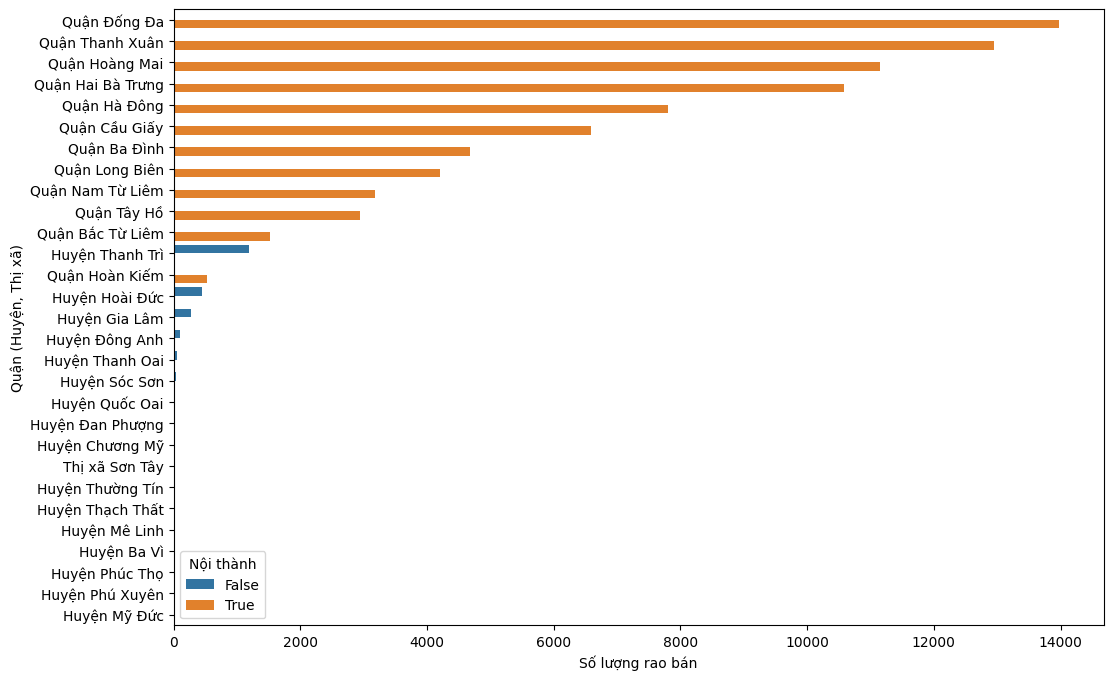

In [77]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Quận', hue='Nội thành', order=df['Quận'].value_counts().index)
plt.xlabel('Số lượng rao bán')
plt.ylabel('Quận (Huyện, Thị xã)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
df['Quận (Huyện, Thị xã)'].value_counts().plot(kind='barh')

plt.show()